In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.drop(["PassengerId","Name","Ticket","Fare","Cabin"],axis = 1,inplace=True)

In [7]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [8]:
data["Familysize"] = data.SibSp + data.Parch

In [9]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Familysize
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0


In [10]:
data.drop(["SibSp","Parch"],axis = 1,inplace=True)

In [11]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,Familysize
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0


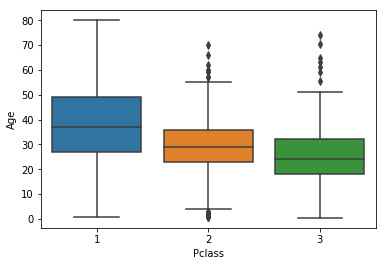

In [13]:
sns.boxplot(x = "Pclass",y = "Age",data = data)
plt.show()

In [14]:
median1 = data.query('Pclass == 1')["Age"].median()

In [15]:
median1

37.0

In [16]:
median2 = data.query('Pclass == 2')["Age"].median()

In [17]:
median2

29.0

In [18]:
median3 = data.query('Pclass == 3')["Age"].median()

In [19]:
median3

24.0

In [20]:
std1 = data.query('Pclass == 1')["Age"].std()

In [21]:
std1

14.802855896450462

In [22]:
std2 = data.query('Pclass == 2')["Age"].std()

In [23]:
std2

14.0010768124762

In [24]:
std3 = data.query('Pclass == 3')["Age"].std()

In [25]:
std3

12.495398210982415

In [26]:
outliers1 = (data.query('Pclass == 1')["Age"] - median1).abs()>std1
outliers2 = (data.query('Pclass == 2')["Age"] - median2).abs()>std2
outliers3 = (data.query('Pclass == 3')["Age"] - median3).abs()>std3

In [27]:
out = pd.concat([outliers1,outliers2,outliers3],axis = 0)

In [28]:
data["Age"][out] = np.nan

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
data.isna().sum()

Survived        0
Pclass          0
Sex             0
Age           392
Embarked        2
Familysize      0
dtype: int64

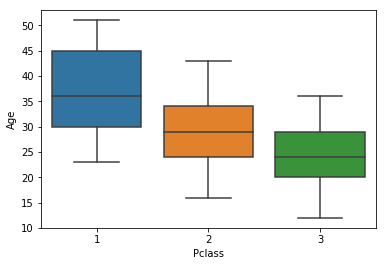

In [30]:
sns.boxplot(x = "Pclass",y = "Age",data = data)
plt.show()

In [57]:
for i,value in data.Age.iteritems():
    if(math.isnan(value)):
        if(data["Pclass"][i] == 1):
            data["Age"][i] = median1
        elif(data["Pclass"][i] == 2):
            data["Age"][i] = median2
        if(data["Pclass"][i] == 3):
            data["Age"][i] = median3
       

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
a = "np.nan"

In [49]:
import math

In [58]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Embarked      2
Familysize    0
dtype: int64

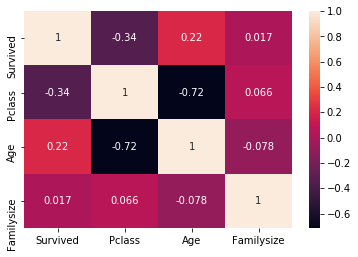

In [60]:
sns.heatmap(data.corr(),annot = True)

In [61]:
data.drop("Embarked",axis = 1,inplace = True)

In [62]:
data.head()

,Survived,Pclass,Sex,Age,Familysize
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


In [63]:
data.dtypes

Survived        int64
Pclass          int64
Sex            object
Age           float64
Familysize      int64
dtype: object

In [67]:
data["Sex"] = data["Sex"].astype('category')


In [69]:
data.drop("Male",axis = 1,inplace = True)

In [70]:
data.dtypes

Survived         int64
Pclass           int64
Sex           category
Age            float64
Familysize       int64
dtype: object

In [71]:
data.head()

,Survived,Pclass,Sex,Age,Familysize
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


In [72]:
data["Male"] = data["Sex"].cat.codes

In [74]:
data.drop("Sex",axis = 1,inplace = True)

In [75]:
data.head()

,Survived,Pclass,Age,Familysize,Male
0,0,3,22.0,1,1
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,1


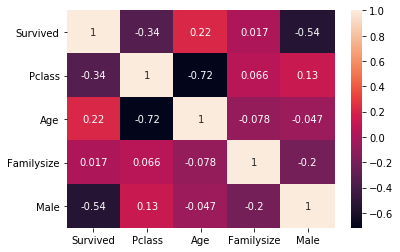

In [77]:
sns.heatmap(data.corr(), annot=True)

In [78]:
from sklearn.model_selection import train_test_split

In [80]:
y = data["Survived"]

In [86]:
X = data.drop("Survived",axis = 1)

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [89]:
X_train.shape

(668, 4)

In [90]:
X_test.shape

(223, 4)

In [92]:
y_train.shape

(668,)

In [93]:
y_test.shape

(223,)

In [95]:
from sklearn.linear_model import LogisticRegression

In [138]:
lr = LogisticRegression(C = 10000)

In [139]:
lr

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [140]:
lr.fit(X_train,y_train)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [141]:
lr.score(X_test,y_test)

0.7982062780269058

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [229]:
dt = DecisionTreeClassifier(random_state=0,max_depth=3)

In [230]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [231]:
dt.score(X_test,y_test)

0.8026905829596412

In [156]:
from sklearn.neighbors import KNeighborsClassifier

In [192]:
knn = KNeighborsClassifier(n_neighbors=20)

In [193]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [194]:
knn.score(X_test,y_test)

0.8026905829596412

In [195]:

from sklearn.ensemble import RandomForestClassifier

In [218]:
rcl = RandomForestClassifier(max_depth=10)

In [219]:
rcl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [222]:
rcl.score(X_test,y_test)

0.820627802690583

In [232]:
datatest = pd.read_csv("test.csv")

In [233]:
datatest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [236]:
datatest.drop(["Name","Ticket","Fare","Cabin","Embarked"],axis = 1, inplace=True)

In [238]:
datatest["Familysize"] = datatest["SibSp"]+datatest["Parch"]

In [241]:
datatest.drop(["SibSp","Parch"],axis = 1,inplace=True)

In [243]:
datatest["Sex"] = datatest["Sex"].astype("category")

In [245]:
datatest["Male"] = datatest["Sex"].cat.codes

In [247]:
datatest.drop(["Sex"],axis = 1,inplace=True)

In [251]:
a = datatest.PassengerId


In [253]:
datatest.drop("PassengerId",axis = 1,inplace = True)

In [254]:
datatest.head()

,Pclass,Age,Familysize,Male
0,3,34.5,0,1
1,3,47.0,1,0
2,2,62.0,0,1
3,3,27.0,0,1
4,3,22.0,2,0


In [256]:
datatest.isna().sum()

Pclass         0
Age           86
Familysize     0
Male           0
dtype: int64

In [259]:
median3

24.0

In [260]:
for i,value in datatest.Age.iteritems():
    if(math.isnan(value)):
        if(datatest["Pclass"][i] == 1):
            datatest["Age"][i] = median1
        elif(datatest["Pclass"][i] == 2):
            datatest["Age"][i] = median2
        elif(datatest["Pclass"][i] == 3):
            datatest["Age"][i] = median3

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [261]:
datatest.isna().sum()

Pclass        0
Age           0
Familysize    0
Male          0
dtype: int64

In [262]:
pred = rcl.predict(datatest)

In [264]:
p = a + pred

In [266]:
type(a)

pandas.core.series.Series

In [267]:
type(pred)

numpy.ndarray

In [268]:
dt = pd.DataFrame(data=pred, columns=["Survived"])

In [288]:
dt1 = pd.DataFrame(data = a, columns = ["PassengerId"])

In [289]:
dt2 = pd.concat([dt1,dt],axis = 1)

In [275]:
dt2.to_csv("submission.csv")

In [291]:
b = np.array(a)

In [281]:
type(b)

numpy.ndarray

In [292]:
dt1 = pd.DataFrame(data = b, columns = ["PassengerId"])

In [293]:
dt2 = pd.concat([dt1,dt],axis = 1)

In [297]:
dt2.iloc[:,0:2].to_csv("new.csv")

In [299]:
dt2.to_csv("submission.csv",index=False)

In [287]:
a

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64